<h1>Prediksi Pasien Liver dengan Support Vector Machine (SVM)</h1>

## Support Vector Machine (SVM)

__Support Vector Machine__ atau __SVM__ adalah algoritma <i>machine learning</i> yang cukup populer untuk kasus <i>supervised learning</i>. SVM dapat digunakan untuk kasus klasifikasi maupun regresi, namun kebanyakan digunakan untuk klasifikasi. 

Cara kerja dari algoritma ini adalah dengan membuat <i>best line</i> atau <i>decision boundary</i> yang disebut dengan __hyperplane__ yang membagi ruang n-dimensi ke dalam kelas/kategori sehingga nantinya akan dengan mudah menentukan kelas/kategori data baru. 

## Dataset

Dataset <a href='https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)'>ILPD (Indian Liver Patient Dataset)</a> 

__Attribute Information:__

1. __Age:__ Age of the patient
2. __Gender:__ Gender of the patient
3. __TB:__ Total Bilirubin
4. __DB:__ Direct Bilirubin
5. __Alkphos:__ Alkaline Phosphotase
6. __Sgpt:__ Alamine Aminotransferase
7. __Sgot:__ Aspartate Aminotransferase
8. __TP:__ Total Protiens
9. __ALB:__ Albumin
10. __A/G Ratio:__ Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

Membuat model <i>machine learning</i> untuk memprediksi kelas data baru apakah termasuk pasien liver atau bukan menggunakan algoritma Support Vector Machine (SVM).

<i>import</i> <i>library</i> yang akan digunakan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengabaikan warning yang mungkin terjadi
import warnings
warnings.filterwarnings('ignore')

<i>load</i> dataset CSV ke dalam dataframe Pandas dengan <code>read_csv()</code>.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [ ]:
# Mendefinisikan nama kolom
column_names = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase','SGPT','SGOT','Total Protein',
                'Albumin','Albumin and Globulin Ratio','Class']

# Load dataset
df = pd.read_csv('Indian-Liver-Patient-Dataset-(ILPD).csv', names = column_names)
df.head(10)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,SGPT,SGOT,Total Protein,Albumin,Albumin and Globulin Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


## Analisis dan visualisasi data

In [ ]:
# Menampilkan info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   SGPT                        583 non-null    int64  
 6   SGOT                        583 non-null    int64  
 7   Total Protein               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Class                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


kolom <code>Albumin and Globulin Ratio</code> jumlah datanya lebih sedikit dari kolom lainnya. Ini berarti ada <i>missing values</i>.

Selanjutnya cek statistik deskriptifnya dengan <code>describe()</code>.

In [ ]:
# Menampilkan statistik deskriptif data

df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,SGPT,SGOT,Total Protein,Albumin,Albumin and Globulin Ratio,Class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<code>describe()</code> menampilkan statistik dari dataset seperti jumlah data (__count__), rata-rata (__mean__), standar deviasi (__std__), nilai minimum (__min__), kuartil 1 (__25%__), median/kuartil 2 (__50%__), kuartil 3 (__75%__), dan nilai maksimum (__max__) untuk tiap kolom numerik.

cek jumlah data untuk tiap kategori pada kolom target yaitu <code>Class</code> dengan <code>value_counts()</code>.

In [ ]:
# Menampilkan jumlah data untuk tiap kategori pada kolom 'Class'

df['Class'].value_counts()

1    416
2    167
Name: Class, dtype: int64

ada __416__ data yang termasuk dalam <i>class</i> <b>1</b> (<b>Liver Patient</b>) dan <b>167</b> di <i>class</i> <b>2</b> (<b>Non Liver Patient</b>).

visualisasikan kolom <code>Class</code> berdasarkan jenis kelaminnya.

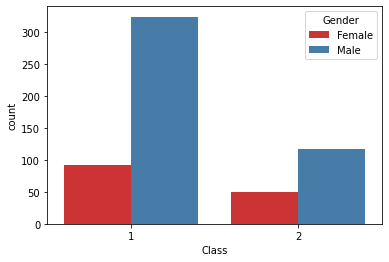

In [ ]:
# Visualisasi data dengan countplot 

sns.countplot(x='Class', hue='Gender', data=df, palette='Set1')

Ternyata untuk masing-masing <i>class</i> jumlah pasien laki-laki lebih banyak dari pasien perempuan.

Membuat <i>scatter plot</i> untuk melihat sebaran 100 data pertama berdasarkan kolom <code>Age</code> dan <code>Albumin</code>.

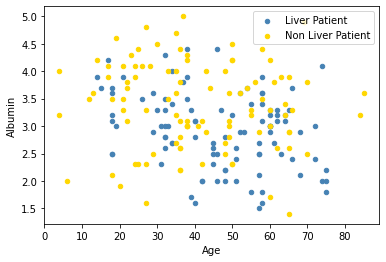

In [ ]:
# Visualisasi 100 data pertama dengan scatter plot untuk kolom 'Class'

x = df[df['Class'] == 1][0:100].plot(kind='scatter', x='Age', y='Albumin', color='SteelBlue', label='Liver Patient');

df[df['Class'] == 2][0:100].plot(kind='scatter', x='Age', y='Albumin', color='Gold', label='Non Liver Patient', ax=x);
plt.show()

gunakan histogram untuk melihat sebaran data tiap kolom.

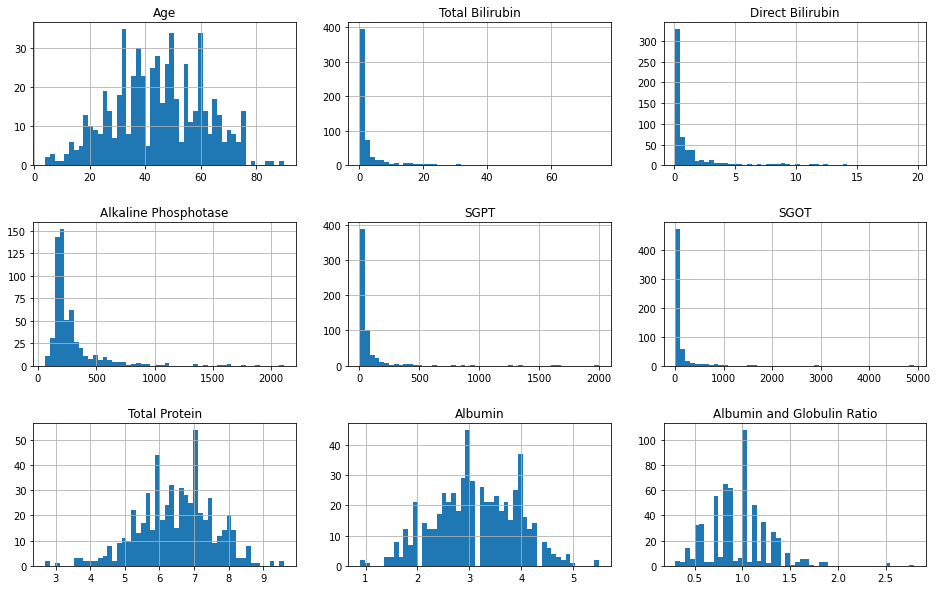

In [ ]:
# Menampilkan histogram dari kolom fitur numerik

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(16, 10)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0]) 
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[0,2])  
ax3 = fig.add_subplot(ax[1,0]) 
ax4 = fig.add_subplot(ax[1,1])  
ax5 = fig.add_subplot(ax[1,2]) 
ax6 = fig.add_subplot(ax[2,0]) 
ax7 = fig.add_subplot(ax[2,1])  
ax8 = fig.add_subplot(ax[2,2]) 

df.hist(column='Age', bins=50, ax=ax0)
df.hist(column='Total Bilirubin', bins=50, ax=ax1)
df.hist(column='Direct Bilirubin', bins=50, ax=ax2)
df.hist(column='Alkaline Phosphotase', bins=50, ax=ax3)
df.hist(column='SGPT', bins=50, ax=ax4)
df.hist(column='SGOT', bins=50, ax=ax5)
df.hist(column='Total Protein', bins=50, ax=ax6)
df.hist(column='Albumin', bins=50, ax=ax7)
df.hist(column='Albumin and Globulin Ratio', bins=50, ax=ax8)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

## Preprocessing

cek dimensi data dengan atribut <code>shape</code>.

In [ ]:
# Mengecek dimensi data

df.shape

(583, 11)

### Menangani missing values

lihat ada berapa <i>missing values</i> pada dataset ini dengan <code>isnull().sum()</code>.

In [ ]:
# Mengecek missing values pada tiap kolom

df.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
SGPT                          0
SGOT                          0
Total Protein                 0
Albumin                       0
Albumin and Globulin Ratio    4
Class                         0
dtype: int64

Ternyata hanya ada __4__ <i>missing values</i> pada kolom <code>Albumin dan Globulin Ratio</code>.

Selanjutnya isi nilai yang hilang tersebut dengan <code>mean()</code>.

In [ ]:
# Mengisi missing values dengan nilai rata-rata 

df['Albumin and Globulin Ratio'].fillna(df['Albumin and Globulin Ratio'].mean(), inplace=True)

Cek lagi jumlah <i>missing values</i>.

In [ ]:
# Mengecek kembali missing values

df.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
SGPT                          0
SGOT                          0
Total Protein                 0
Albumin                       0
Albumin and Globulin Ratio    0
Class                         0
dtype: int64

Sekarang sudah tidak ada <i>missing values</i>.

### Menangani duplikat data

cek apakah ada duplikat data pada dataframe <code>df</code> dengan <code>duplicated().values.any()</code>.

In [ ]:
# Mengecek duplikat data

df.duplicated().values.any()

True

Ternyata ada duplikat data. hapus duplikat data dengan <code>drop_duplicates()</code>.

In [ ]:
# Menghapus duplikat data

df = df.drop_duplicates()

Lalu cek lagi dimensi data setelah menghapus duplikat.

In [ ]:
# Mengecek dimensi data setelah menghapus duplikat

df.shape

(570, 11)

Dimensi data sekarang adalah (__570, 11__) yang berarti berkurang __13__ baris data dari yang sebelumnya 583.

### Memisahkan data fitur dan target

Selanjutnya memisahkan data fitur dan target. Data targetnya adalah kolom <code>Class</code> dan sisa kolom lainnya merupakan data fitur, sehingga untuk mendefinisikan data fitur, hanya perlu menghapus kolom <code>Class</code>.

In [ ]:
# Mendefinisikan data fitur dan target

df_features = df.drop('Class', axis=1)
df_target = df['Class']

In [ ]:
# Menampilkan data fitur

df_features.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,SGPT,SGOT,Total Protein,Albumin,Albumin and Globulin Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


### Encoding

Dari 10 kolom yang akan digunakan sebagai fitur, kolom <code>Gender</code> masih bertipe non-numerik. Oleh karena itu, lakukan <i>encoding</i> pada kolom tersebut dengan <code>.cat.codes</code> dengan mengubah tipe datanya terlebih dahulu menjadi <i>category</i>.

In [ ]:
# Mengubah tipe data 'Gender' menjadi category
df_features['Gender'] = df_features['Gender'].astype('category')

# Encoding data
df_features['Gender'] = df_features['Gender'].cat.codes
df_features.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,SGPT,SGOT,Total Protein,Albumin,Albumin and Globulin Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


### Normalisasi

Seperti yang kita lihat bahwa <i>range</i> angka tiap kolom berbeda jauh, sehingga perlu melakukan normalisasi terlebih dahulu terhadap dataframe <code>df_features</code>.

gunakan <code>StandardScaler</code> untuk normalisasi data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Mendefinisikan nama kolom fitur
cols = list(df_features.columns)

# Normalisasi data dengan StandardScaler
df_features_scaled = pd.DataFrame(data = df_features)
df_features_scaled[cols] = StandardScaler().fit_transform(df_features[cols])
df_features_scaled.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,SGPT,SGOT,Total Protein,Albumin,Albumin and Globulin Ratio
0,1.241741,-1.752549,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150824
1,1.056874,0.570597,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653605
2,1.056874,0.570597,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.182248
3,0.810385,0.570597,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163413
4,1.673096,0.570597,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.722013


In [ ]:
# Menggabungkan kembali dataframe fitur dan target

df_join = pd.concat([df_features_scaled, df_target], axis=1)
df_join.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,SGPT,SGOT,Total Protein,Albumin,Albumin and Globulin Ratio,Class
0,1.241741,-1.752549,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150824,1
1,1.056874,0.570597,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653605,1
2,1.056874,0.570597,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.182248,1
3,0.810385,0.570597,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163413,1
4,1.673096,0.570597,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.722013,1


### Train test split

Memisahkan <code>df_join</code> menjadi data latih dan data uji dengan <code>train_test_split</code> dengan persentase 80% data latih dan 20% data uji.

In [ ]:
from sklearn.model_selection import train_test_split

# Mendefinisikan fitur dan target
X = df_join.iloc[:,:-1] 
y = df_join['Class']

# Membagi data latih dan data uji dengan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Menampilkan dimensi data latih dan data uji
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (456, 10) (456,)
Test set: (114, 10) (114,)


## Modeling 

### Klasifikasi dengan Support Vector Machine (SVM)

Untuk masalah klasifikasi, gunakan __Support Vector Classification__ atau __SVC__ dari SVM. 

Tahapannya sama dengan proses klasifikasi dengan algoritma lainnya, yaitu mendefinisikan model <code>SVC()</code>, melatihnya dengan <code>fit()</code>, kemudian menguji model dengan melakukan prediksi terhadap data test dengan <code>predict()</code>.

In [ ]:
from sklearn.svm import SVC

# Melatih model
model = SVC(gamma='scale').fit(X_train, y_train)

# Menguji model / memprediksi dengan X_test
y_pred = model.predict(X_test)

### Evaluasi

evaluasi hasil model tersebut dengan <code>accuracy_score()</code> untuk <i>train set</i> dan <i>test set</i>-nya.

In [ ]:
from sklearn.metrics import accuracy_score

# Menampilkan akurasi data latih dan data uji
print('Akurasi Train set: %.3f' % accuracy_score(y_train, model.predict(X_train)))
print('Akurasi Test set: %.3f' % accuracy_score(y_test, y_pred))

Akurasi Train set: 0.708
Akurasi Test set: 0.737


## Parameter Tuning

Parameter tuning adalah sebuah proses mencari kombinasi parameter yang akan menghasilkan akurasi terbaik. Di Sklearn, ada dua <i>package</i> dari <i>library</i> __model_selection__ yang dapat digunakan untuk proses parameter tuning, yaitu __GridSearchCV__ dan __RandomizedSearchCV__.

### GridSearchCV

<code>GridSearchCV</code> adalah salah satu teknik parameter tuning yang cara kerjanya yaitu dengan mencoba semua kombinasi parameter yang didefinisikan.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Mendefinisikan parameter yang ingin dicoba
param_grid = {'gamma': ['auto', 'scale'], 
             'kernel': ['linear', 'sigmoid', 'poly', 'rbf'], 
             'degree': np.arange(1,6)}

# Modeling dengan SVM + Grid Search
model = SVC()
gscv = GridSearchCV(model, param_grid, scoring='accuracy', cv=10)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'degree': array([1, 2, 3, 4, 5]),
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']},
             scoring='accuracy')

Untuk menampilkan hasil parameter terbaik dapat menggunakan atribut <code>.best_param_</code>.

In [ ]:
# Menampilkan hasil parameter terbaik

print('Parameter terbaik hasil Grid Search: ', gscv.best_params_)

Parameter terbaik hasil Grid Search:  {'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


Untuk menampilkan hasil akurasi terbaik dapat menggunakan atribut <code>.best_score_</code>.

In [ ]:
# Menampilkan akurasi data latih

print('Akurasi Train set: %.3f'% gscv.best_score_)

Akurasi Train set: 0.717


In [ ]:
# Menguji model dengan X_test
y_pred_gscv = gscv.predict(X_test)

# Menampilkan akurasi hasil pengujian
print('Akurasi Test set: %.3f'% accuracy_score(y_test, y_pred_gscv))

Akurasi Test set: 0.719


### RandomizedSearchCV

<code>RandomizedSearchCV</code> adalah salah satu teknik parameter tuning dimana parameter yang uji diambil secara acak dari parameter yang sudah didefinisikan. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Mendefinisikan parameter yang ingin dicoba
param_grid = {'gamma': ['auto', 'scale'], 
             'kernel': ['linear', 'sigmoid', 'poly', 'rbf'], 
             'degree': np.arange(1,6)}

# Modeling dengan SVM + Randomized Search
model = SVC()
rscv = RandomizedSearchCV(model, param_grid, scoring='accuracy', cv=10)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'sigmoid', 'poly',
                                                   'rbf']},
                   scoring='accuracy')

In [ ]:
# Menampilkan parameter terbaik

print('Parameter terbaik hasil Randomized Search: ', rscv.best_params_)

Parameter terbaik hasil Randomized Search:  {'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 1}


In [ ]:
# Menampilkan hasil akurasi data latih

print('Akurasi Train set: %.3f'% rscv.best_score_)

Akurasi Train set: 0.717


In [ ]:
# Menguji model dengan X_test
y_pred_rscv = rscv.predict(X_test)

# Menampilkan akurasi hasil pengujian
print('Akurasi Test set: %.3f'% accuracy_score(y_test, y_pred_rscv))

Akurasi Test set: 0.719


Hasil RandomizedSearchCV dapat berubah-ubah karena di-<i>generate</i> secara random.



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


